#TensorFlow

In [1]:
##### Import all necessity functions for Machine Learning #####
import sys
import math
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as shc
import warnings
import zipfile
import cv2
import os
import re
import nltk
import random
import requests
from bs4 import BeautifulSoup
import re
from collections import Counter
from functools import reduce
from itertools import chain
from wordcloud import WordCloud
from google.colab.patches import cv2_imshow
from keras.preprocessing import image
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression, SelectKBest, chi2, VarianceThreshold
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.over_sampling import RandomOverSampler, SMOTE, SMOTEN, SMOTENC, SVMSMOTE, KMeansSMOTE, BorderlineSMOTE, ADASYN
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor, NearestNeighbors
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier, SGDRegressor, Perceptron
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, ExtraTreeClassifier, ExtraTreeRegressor
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, RandomForestClassifier, RandomForestRegressor, VotingClassifier, VotingRegressor
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor, GradientBoostingClassifier, GradientBoostingRegressor, StackingClassifier, StackingRegressor
from sklearn.metrics import classification_report, mean_absolute_error, mean_squared_error, r2_score, accuracy_score, recall_score, precision_score, f1_score, silhouette_score
from xgboost import XGBClassifier, XGBRegressor

##### Download keras #####
!pip install keras

##### Remove all warnings #####
import warnings
warnings.filterwarnings("ignore")

##### Import all necessity functions for Neural Network #####
import tensorflow as tf
from keras.models import Sequential, Model
from keras.utils import plot_model
from keras.layers import Dense, Conv2D, LSTM, GRU, RNN, Flatten, AvgPool2D, MaxPool2D, GlobalAveragePooling2D, BatchNormalization, Dropout, LeakyReLU, ELU, PReLU,  Embedding
from keras.activations import tanh, relu, sigmoid, softmax, swish
from keras.regularizers import L1, L2, L1L2
from keras.optimizers import SGD, Adagrad, Adadelta, RMSprop, Adam, Adamax, Nadam
from keras.initializers import HeNormal, HeUniform, GlorotNormal, GlorotUniform
from keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy, hinge, MSE, MAE, Huber, BinaryCrossentropy
import keras.utils as image
from google.colab.patches import cv2_imshow
from keras.utils import plot_model

##### Plotting the confusion matrix #####
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix

###### NLP Libraries ######

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

###### Download functions for nltk ######

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

####Load the dataset

In [2]:
df = pd.read_csv('/content/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


####Split the dataset into train and testing

In [3]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X,\
                                                    y,\
                                                    test_size = 0.25,\
                                                    random_state = 42)

print("The shape of X_train is = {}".format(X_train.shape),'\n')
print("The shape of X_test is  = {}".format(X_test.shape),'\n')
print("The shape of y_train is = {}".format(y_train.shape),'\n')
print("The shape of y_test  is = {}".format(X_test.shape))

The shape of X_train is = (576, 8) 

The shape of X_test is  = (192, 8) 

The shape of y_train is = (576,) 

The shape of y_test  is = (192, 8)


####Do the Standard Scaler

In [4]:
# standard_scaler = StandardScaler()
# X_train = standard_scaler.fit_transform(X_train)

In [5]:
# X_test = standard_scaler.transform(X_test)

####Create the Sequential Model with TensorFlow & Keras

In [6]:
model = Sequential()
"""Create the first hidden layer"""
model.add(Dense(units = 64,\
                kernel_initializer = 'he_normal',\
                activation = 'relu',\
                input_shape = X_train.shape[1:]))
"""Create the second hidden layer"""
model.add(Dense(units = 32,\
                kernel_initializer = 'he_normal',\
                activation = 'relu'))
"""Create the output layer"""
model.add(Dense(units = 1,\
                kernel_initializer = 'glorot_uniform',\
                activation = 'sigmoid'))
"""Compile the Neural Network"""
model.compile(optimizer = Adam(learning_rate = 0.001),\
              loss = BinaryCrossentropy(),\
              metrics = ['accuracy'])

In [7]:
"""Display the model summary"""
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                576       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,689
Trainable params: 2,689
Non-trainable params: 0
_________________________________________________________________


In [8]:
"""Run the model with
    EPOCH: 100
    batch_size: 16
"""
history = model.fit(x = X_train,\
                    y = y_train,\
                    epochs = 100,\
                    batch_size = 32,\
                    validation_data = (X_test, y_test),\
                    verbose = 1)

Epoch 1/100
18/18 [==============================] - 2s 21ms/step - loss: 9.6009 - accuracy: 0.5087 - val_loss: 5.5968 - val_accuracy: 0.5365
Epoch 2/100
18/18 [==============================] - 0s 7ms/step - loss: 4.1222 - accuracy: 0.6059 - val_loss: 3.0825 - val_accuracy: 0.5938
Epoch 3/100
18/18 [==============================] - 0s 7ms/step - loss: 3.0454 - accuracy: 0.5729 - val_loss: 2.9449 - val_accuracy: 0.6250
Epoch 4/100
18/18 [==============================] - 0s 6ms/step - loss: 2.1611 - accuracy: 0.6042 - val_loss: 2.0984 - val_accuracy: 0.6458
Epoch 5/100
18/18 [==============================] - 0s 5ms/step - loss: 1.4903 - accuracy: 0.6424 - val_loss: 1.8041 - val_accuracy: 0.5990
Epoch 6/100
18/18 [==============================] - 0s 5ms/step - loss: 1.3006 - accuracy: 0.6198 - val_loss: 1.7531 - val_accuracy: 0.6510
Epoch 7/100
18/18 [==============================] - 0s 5ms/step - loss: 1.3050 - accuracy: 0.6215 - val_loss: 1.6135 - val_accuracy: 0.6615
Epoch 8/100


In [9]:
"""Make the prediction"""
predicted = np.where(model.predict(X_test) > 0.5, 1, 0)

print("accuracy  ## {}".upper().format(accuracy_score(predicted, y_test)),'\n')
print("precision ## {}".upper().format(precision_score(predicted, y_test)),'\n')
print("recall    ## {}".upper().format(recall_score(predicted, y_test)),'\n')
print("f1_score  ## {}".upper().format(f1_score(predicted, y_test)))

6/6 [==============================] - 0s 3ms/step
ACCURACY  ## 0.59375 

PRECISION ## 0.7536231884057971 

RECALL    ## 0.46017699115044247 

F1_SCORE  ## 0.5714285714285714


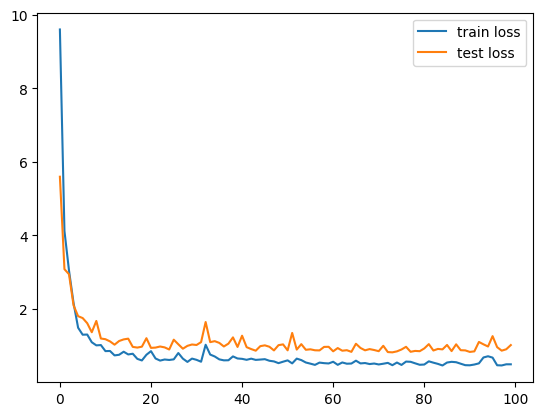

In [10]:
plt.plot(history.history['loss'], label = 'train loss')
plt.plot(history.history['val_loss'], label = 'test loss')
plt.legend()
plt.show()

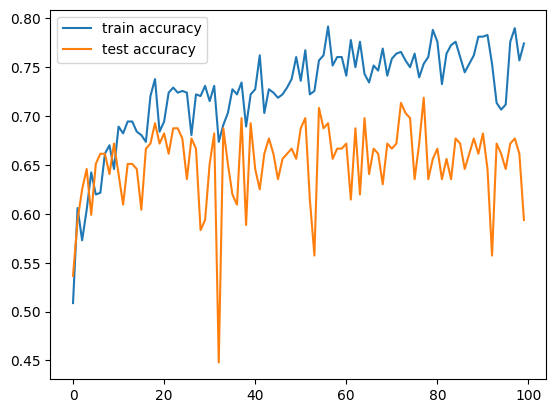

In [11]:
plt.plot(history.history['accuracy'], label = 'train accuracy')
plt.plot(history.history['val_accuracy'], label = 'test accuracy')
plt.legend()
plt.show()

#PyTorch Implementation

In [12]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [13]:
#Import some of the crucial library
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim

In [14]:
"""Make this data as a torch Float"""
X_float = torch.tensor(data = X, dtype = torch.float32)
y_float = torch.tensor(data = y, dtype = torch.float32)

In [15]:
X_float

tensor([[  6.0000, 148.0000,  72.0000,  ...,  33.6000,   0.6270,  50.0000],
        [  1.0000,  85.0000,  66.0000,  ...,  26.6000,   0.3510,  31.0000],
        [  8.0000, 183.0000,  64.0000,  ...,  23.3000,   0.6720,  32.0000],
        ...,
        [  5.0000, 121.0000,  72.0000,  ...,  26.2000,   0.2450,  30.0000],
        [  1.0000, 126.0000,  60.0000,  ...,  30.1000,   0.3490,  47.0000],
        [  1.0000,  93.0000,  70.0000,  ...,  30.4000,   0.3150,  23.0000]])

In [16]:
y_float

tensor([1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1.,
        0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1.,
        0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0.,
        1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1.,
        0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0.,
        0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1.,
        0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1.,
        1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1.,
        1., 0., 1., 1., 1., 1., 0., 0., 

In [17]:
"""Split the dataset with train & test"""
X_train, X_test, y_train, y_test = train_test_split(X_float,\
                                                    y_float,\
                                                    test_size = 0.25,\
                                                    random_state = 42)

print("The shape of X_train is = {}".format(X_train.shape),'\n')
print("The shape of X_test is  = {}".format(X_test.shape),'\n')
print("The shape of y_train is = {}".format(y_train.shape),'\n')
print("The shape of y_test  is = {}".format(y_test.shape))

The shape of X_train is = torch.Size([576, 8]) 

The shape of X_test is  = torch.Size([192, 8]) 

The shape of y_train is = torch.Size([576]) 

The shape of y_test  is = torch.Size([192])


####Do the scaling using Standard scaling

In [18]:
# X_train = standard_scaler.fit_transform(X_train)
# X_test  = standard_scaler.transform(X_test)

In [19]:
X_train.shape[1]

8

In [20]:
"""Initialize the DataLoader with batch_size::16"""
loader = DataLoader(dataset = list(zip(X_train, y_train)),\
                    batch_size = 32,\
                    shuffle = True)

print("The batch size is {}".format(loader.batch_size))

The batch size is 32


In [21]:
data, labels = next(iter(loader))

In [22]:
data

tensor([[4.0000e+00, 1.4500e+02, 8.2000e+01, 1.8000e+01, 0.0000e+00, 3.2500e+01,
         2.3500e-01, 7.0000e+01],
        [5.0000e+00, 1.3900e+02, 6.4000e+01, 3.5000e+01, 1.4000e+02, 2.8600e+01,
         4.1100e-01, 2.6000e+01],
        [3.0000e+00, 1.2800e+02, 7.8000e+01, 0.0000e+00, 0.0000e+00, 2.1100e+01,
         2.6800e-01, 5.5000e+01],
        [7.0000e+00, 1.2500e+02, 8.6000e+01, 0.0000e+00, 0.0000e+00, 3.7600e+01,
         3.0400e-01, 5.1000e+01],
        [8.0000e+00, 1.8800e+02, 7.8000e+01, 0.0000e+00, 0.0000e+00, 4.7900e+01,
         1.3700e-01, 4.3000e+01],
        [2.0000e+00, 1.2200e+02, 6.0000e+01, 1.8000e+01, 1.0600e+02, 2.9800e+01,
         7.1700e-01, 2.2000e+01],
        [3.0000e+00, 1.4200e+02, 8.0000e+01, 1.5000e+01, 0.0000e+00, 3.2400e+01,
         2.0000e-01, 6.3000e+01],
        [0.0000e+00, 1.2400e+02, 7.0000e+01, 2.0000e+01, 0.0000e+00, 2.7400e+01,
         2.5400e-01, 3.6000e+01],
        [1.5000e+01, 1.3600e+02, 7.0000e+01, 3.2000e+01, 1.1000e+02, 3.7100e+01,

In [23]:
labels

tensor([1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
        0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1.])

In [24]:
data.shape, labels.shape

(torch.Size([32, 8]), torch.Size([32]))

####Model building

In [25]:
"""Create a class named DiabetesClassifier"""
class DiabetesClassifier(nn.Module):
  """Create an constructor with no parameter"""
  def __init__(self):
    """Call the super() function for inherit the parent class"""
    super().__init__()
    """Create the first hidden & actiation layer with
       input_features = 8,
       output_feature = 64,
       activation:: ReLU
    """
    self.hidden1 = nn.Linear(in_features = 8,\
                             out_features = 64,\
                             bias = True)
    self.activation1 = nn.ReLU()

    """Create the second hidden layer & activation with
       input_features = 64,
       output_featues = 32,
       activation:: ReLU
    """
    self.hidden2 = nn.Linear(in_features = 64,\
                             out_features = 32,\
                             bias = True)
    self.activation2 = nn.ReLU()

    """Create the output layer & activation with
       input_features  = 64,
       output_features = 1,
       activation:: Sigmoid()
    """

    self.output = nn.Linear(in_features = 32,\
                            out_features = 1,\
                            bias = True)
    self.actOutput = nn.Sigmoid()

  """Create the Forward Propagation"""
  def forward(self, x):
    """Make this FP with Activation(W^t + b)"""
    x = self.activation1(self.hidden1(x))
    x = self.activation2(self.hidden2(x))
    x = self.actOutput(self.output(x))

    return x

In [26]:
# Call this model
model = DiabetesClassifier()
#Display this model
print(model.parameters)

<bound method Module.parameters of DiabetesClassifier(
  (hidden1): Linear(in_features=8, out_features=64, bias=True)
  (activation1): ReLU()
  (hidden2): Linear(in_features=64, out_features=32, bias=True)
  (activation2): ReLU()
  (output): Linear(in_features=32, out_features=1, bias=True)
  (actOutput): Sigmoid()
)>


In [27]:
"""Display this model"""
from torchsummary import summary
summary(model = model, input_size = X.shape)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1              [-1, 768, 64]             576
              ReLU-2              [-1, 768, 64]               0
            Linear-3              [-1, 768, 32]           2,080
              ReLU-4              [-1, 768, 32]               0
            Linear-5               [-1, 768, 1]              33
           Sigmoid-6               [-1, 768, 1]               0
Total params: 2,689
Trainable params: 2,689
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.02
Forward/backward pass size (MB): 1.14
Params size (MB): 0.01
Estimated Total Size (MB): 1.17
----------------------------------------------------------------


####Do the comparision with model.summary() -- > TensorFlow

In [28]:
# model.summary()

In [29]:
"""Initialize the loss function & optimizer"""
loss_function = nn.BCELoss()
optimizer = optim.Adam(params = model.parameters(), lr = 0.001)

####Train the model(PyTorch - model)

In [30]:
model.train()
# Initialize the loss & epoch
EPOCHS, LOSS, accuracy = 100, [], []
"""Run a loop
   1. First loop would be: For EPOCH
   2. Second loop would be: For extracting X_batch & y_batch
"""
for epoch in range(EPOCHS):
  loss_calculate = []
  for data_loader in loader:
    """Split the X_batch and y_batch"""
    X_batch, y_batch = data_loader
    """Call the model and do the prediction"""
    prediction = model(X_batch)
    """Compute the loss function
       Here, use flatten() because in **"prediction"** the shape was([16, 1]) & [**y_batch shape is ([16])**. That's the reason !!! We can also use **view()**]
    """
    loss = loss_function(prediction.flatten(), y_batch)
    loss_calculate.append(loss.item())
    """Initialize the Gradient"""
    optimizer.zero_grad()
    """Do the backward propagation"""
    loss.backward()
    optimizer.step()
    """Compute the accuracy for each epoch"""
    y_pred = torch.where(prediction > 0.5, 1, 0)
  # Store this Loss function
  LOSS.append(np.array(loss_calculate).mean())
  # Store this accuracy
  accuracy.append(accuracy_score(y_pred, y_batch.reshape(-1, 1)))
  # Display this ERROR, ACCURACY
  print("For EPOCH: {}, the mean loss function is = {}, and the accuracy is = {}".\
        format(epoch,\
               np.array(loss_calculate).mean(),\
               accuracy_score(y_pred,\
               y_batch.reshape(-1, 1))))

For EPOCH: 0, the mean loss function is = 0.8586602012316386, and the accuracy is = 0.59375
For EPOCH: 1, the mean loss function is = 0.6443792548444536, and the accuracy is = 0.84375
For EPOCH: 2, the mean loss function is = 0.638992021481196, and the accuracy is = 0.78125
For EPOCH: 3, the mean loss function is = 0.6084282795588175, and the accuracy is = 0.71875
For EPOCH: 4, the mean loss function is = 0.6056495590342416, and the accuracy is = 0.5625
For EPOCH: 5, the mean loss function is = 0.5722546362214618, and the accuracy is = 0.75
For EPOCH: 6, the mean loss function is = 0.5835953570074506, and the accuracy is = 0.71875
For EPOCH: 7, the mean loss function is = 0.5795220401551988, and the accuracy is = 0.8125
For EPOCH: 8, the mean loss function is = 0.5767799797985289, and the accuracy is = 0.59375
For EPOCH: 9, the mean loss function is = 0.5881808830632104, and the accuracy is = 0.625
For EPOCH: 10, the mean loss function is = 0.5829796509610282, and the accuracy is = 0.8

In [31]:
model.eval()
predicted = torch.where(model(X_test) > 0.5, 1, 0)
print("accuracy  ## {}".upper().format(accuracy_score(predicted, y_test)),'\n')
print("precision ## {}".upper().format(precision_score(predicted, y_test)),'\n')
print("recall    ## {}".upper().format(recall_score(predicted, y_test)),'\n')
print("f1_score  ## {}".upper().format(f1_score(predicted, y_test)))

ACCURACY  ## 0.7083333333333334 

PRECISION ## 0.4492753623188406 

RECALL    ## 0.6326530612244898 

F1_SCORE  ## 0.5254237288135593


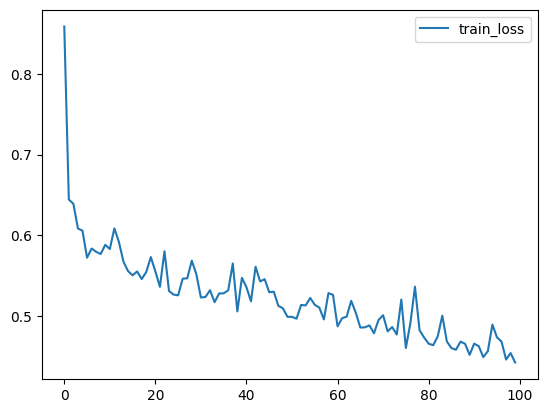

In [32]:
plt.plot(LOSS, label = 'train_loss')
plt.legend()
plt.show()

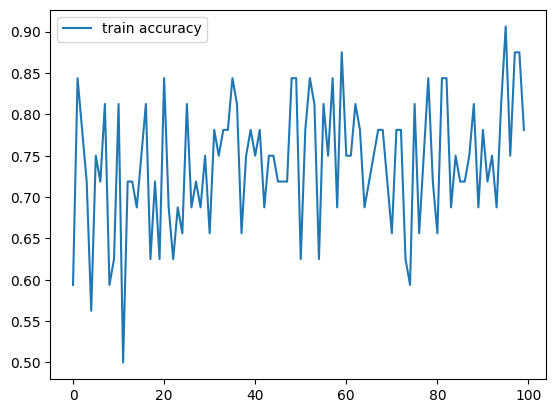

In [33]:
plt.plot(accuracy, label = 'train accuracy')
plt.legend()
plt.show()